# Math 3280 - Homework 8: SVD
(Not complete yet)

1. Explain how the Economy SVD works
    * ( )

2. Load this image into Python: SnowCollege_Winter.jpeg
<br><img src="SnowCollege_Winter.jpeg" alt="Snow College Campus after a heavy frost" width=400>
    * Convert the image to grayscale and perform an SVD to the image
    * Plot the Singular Values and the cumulative percentages of the Singular Values
    * How many ranks (columns) do I need to restore an image to 80% quality? Find an exact number, don't just estimate from the graph.
    * Restore the image to 80% quality.

Explain how the Economy SVD works?

S = svd(A) returns the singular values of matrix A in descending order.

example
[U,S,V] = svd(A) performs a singular value decomposition of matrix A, such that A = U*S*V'.

example
[ ___ ] = svd(A,"econ") produces an economy-size decomposition of A using either of the previous output argument combinations. If A is an m-by-n matrix, then:

m > n — Only the first n columns of U are computed, and S is n-by-n.

m = n — svd(A,"econ") is equivalent to svd(A).

m < n — Only the first m columns of V are computed, and S is m-by-m.

The economy-size decomposition removes extra rows or columns of zeros from the diagonal matrix of singular values, S, along with the columns in either U or V that multiply those zeros in the expression A = U*S*V'. Removing these zeros and columns can improve execution time and reduce storage requirements without compromising the accuracy of the decomposition.

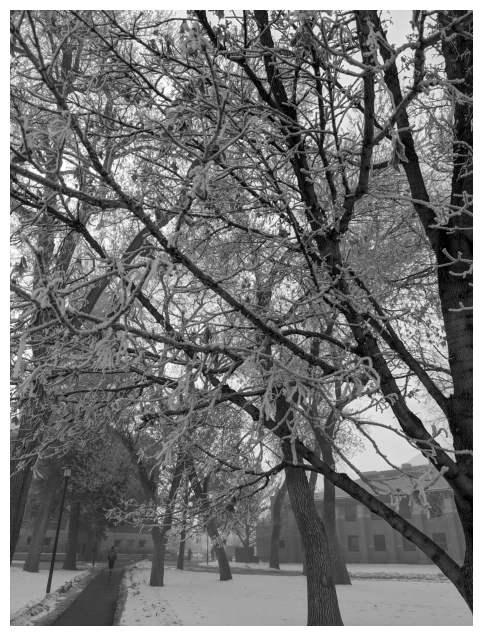

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams["figure.figsize"] = [16, 8]

A = imread("Data/SnowCollege_Winter.jpeg")
X = np.mean(A, -1)
# Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.show()

In [3]:
np.shape(X)

(2298, 1724)

In [4]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

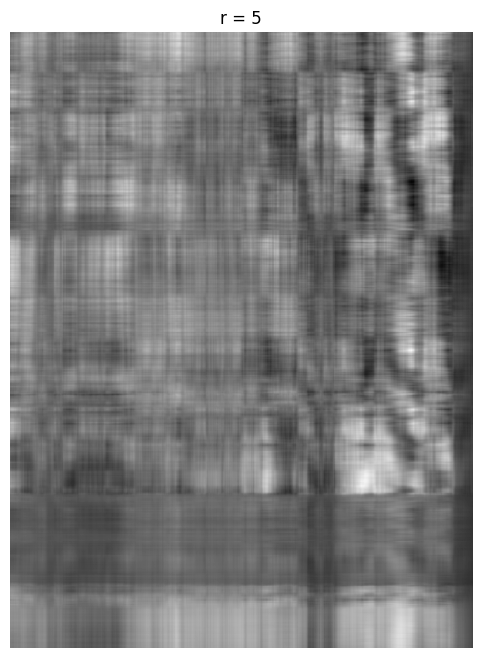

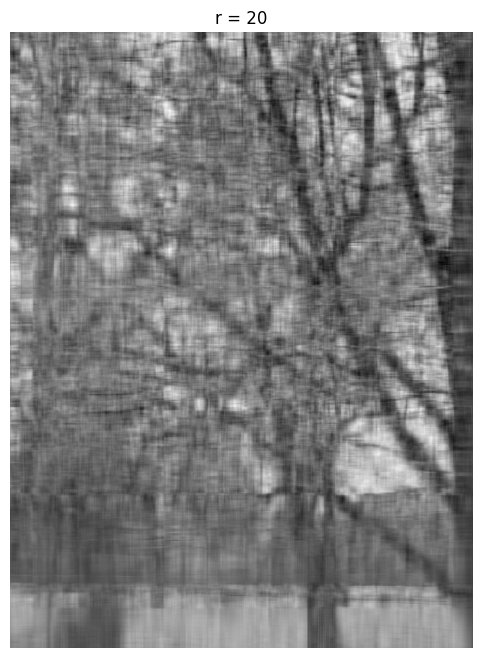

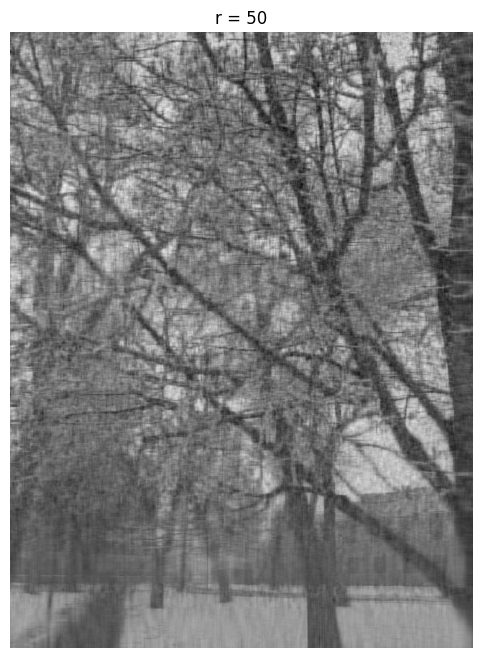

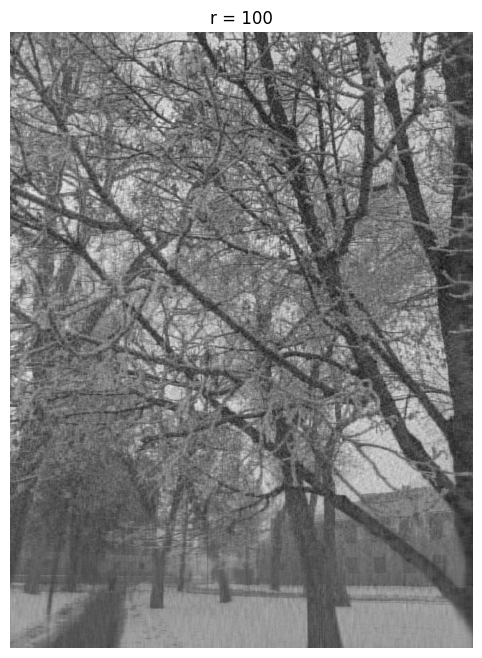

In [8]:
j = 1
for r in (5, 20, 50, 100):
    # Construct approximate image
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure(j)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap("gray")
    plt.axis("off")
    plt.title("r = " + str(r))
    plt.show()

In [6]:
np.shape(U[:, :r])

(2298, 100)

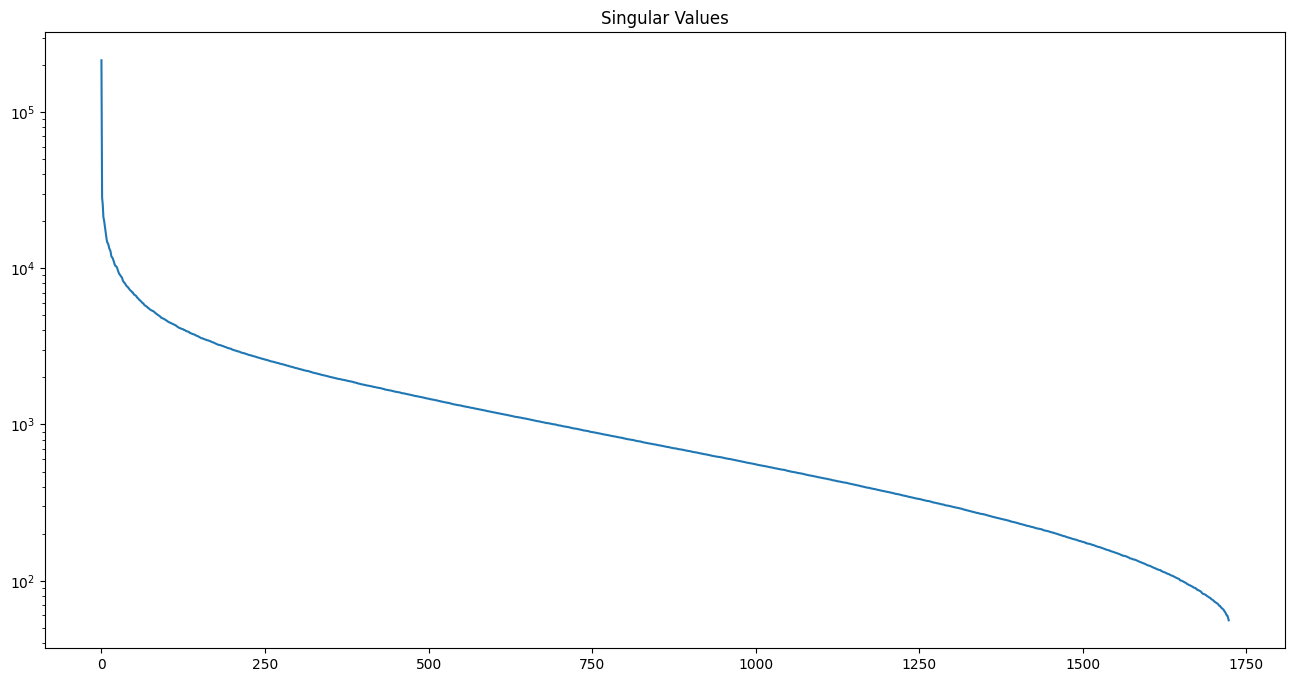

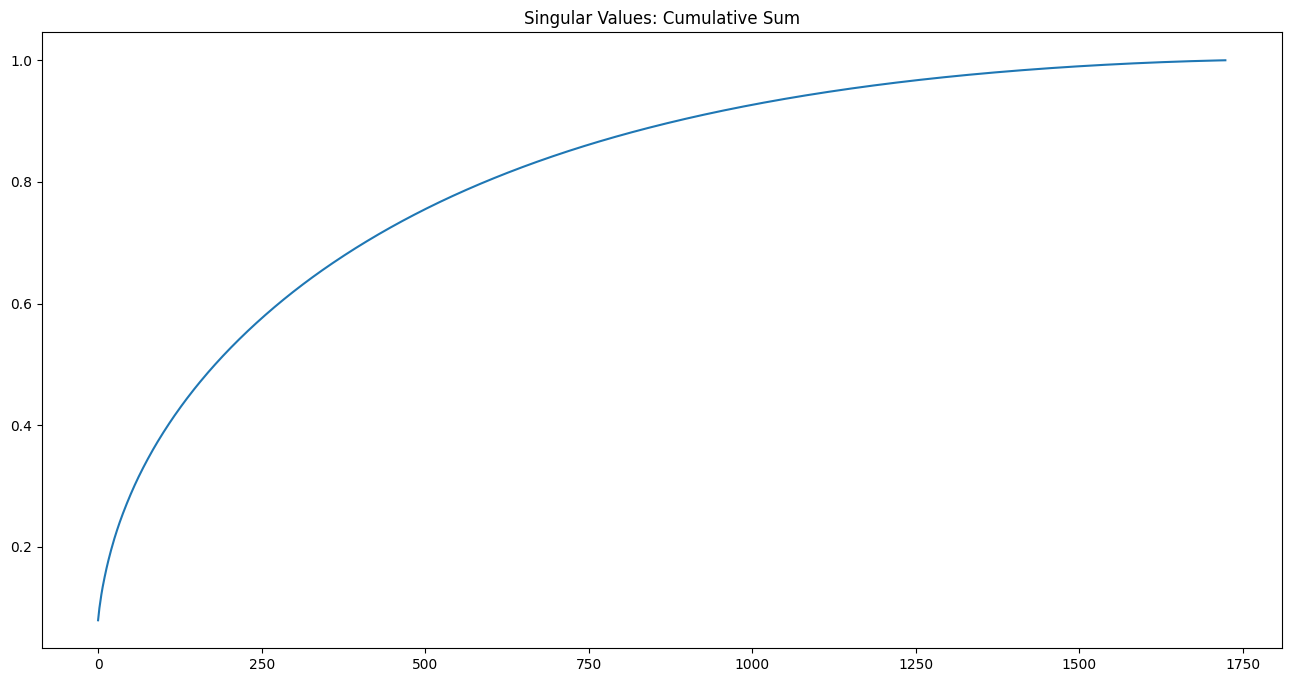

In [9]:
plt.figure(3)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

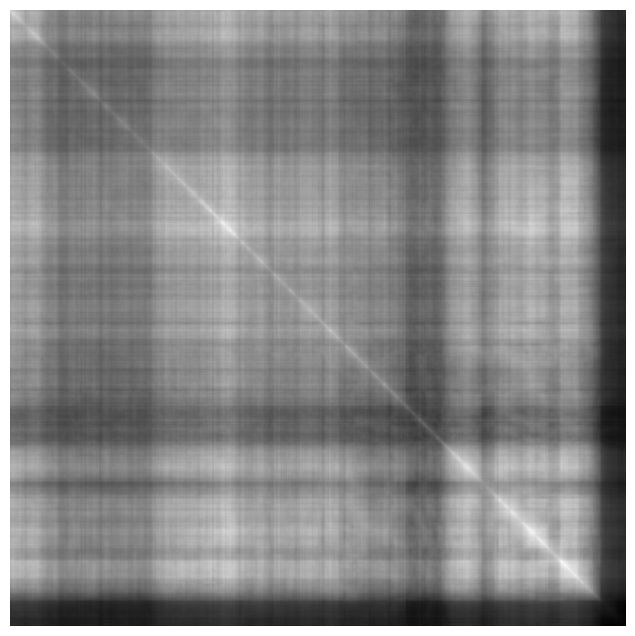

In [10]:
img = plt.imshow(Xapprox.T @ Xapprox)
img.set_cmap("gray")
plt.axis("off")
plt.show()

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams.update({"font.size": 18})

### Set up rotation matrix
theta = np.array([np.pi / 15, -np.pi / 9, -np.pi / 20])
Sigma = np.diag([3, 1, 0.5])  # scale x, then y, then z

# Rotation about x axis
Rx = np.array(
    [
        [1, 0, 0],
        [0, np.cos(theta[0]), -np.sin(theta[0])],
        [0, np.sin(theta[0]), np.cos(theta[0])],
    ]
)

# Rotation about y axis
Ry = np.array(
    [
        [np.cos(theta[1]), 0, np.sin(theta[1])],
        [0, 1, 0],
        [-np.sin(theta[1]), 0, np.cos(theta[1])],
    ]
)

# Rotation about z axis
Rz = np.array(
    [
        [np.cos(theta[2]), -np.sin(theta[2]), 0],
        [np.sin(theta[2]), np.cos(theta[2]), 0],
        [0, 0, 1],
    ]
)

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

In [13]:
### Take the SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
X2 = U @ np.diag(S)

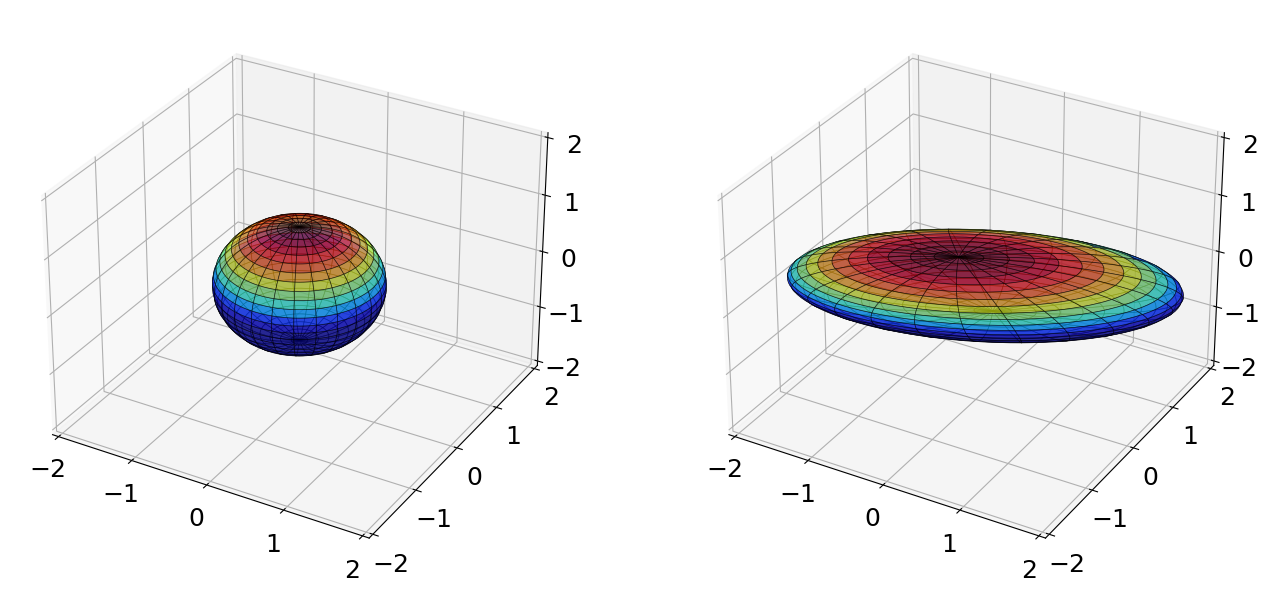

In [14]:
### Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection="3d")
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

### Plot the surface
surf1 = ax1.plot_surface(
    x,
    y,
    z,
    cmap="jet",
    alpha=0.6,
    facecolors=plt.cm.jet(z),
    linewidth=0.5,
    rcount=30,
    ccount=30,
)
surf1.set_edgecolor("k")
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        xR[i, j], yR[i, j], zR[i, j] = X @ [x[i, j], y[i, j], z[i, j]]

ax2 = fig.add_subplot(122, projection="3d")
surf2 = ax2.plot_surface(
    xR,
    yR,
    zR,
    cmap="jet",
    alpha=0.6,
    linewidth=0.5,
    facecolors=plt.cm.jet(z),
    rcount=30,
    ccount=30,
)
surf2.set_edgecolor("k")
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()